Import dependencies and configure settings.

In [3]:
import os
import csv
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats
import statsmodels.api as sm

from pylab import rcParams
from __future__ import division

%matplotlib inline
np.set_printoptions(precision=10)

Load GOOG order message data with 10 price levels into dict, taking only order events between 2pm and 3pm:

In [4]:
dat = 'GOOG_2012-06-21_34200000_57600000_message_10'
temp = ([],[],[],[],[],[])
with open('../../data/'+dat+'.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        temp[0].append(float(row[0]))
        temp[1].append(int(row[1]))
        temp[2].append(int(row[2]))
        temp[3].append(int(row[3]))
        temp[4].append(int(row[4]))
        temp[5].append(int(row[5]))

orders = {'Time':None, 'Type':None, 'Order ID':None,
        'Volume':None, 'Price':None, 'Direction':None}
orders['Time'] = np.asarray(temp[0])
orders['Type'] = np.asarray(temp[1])
orders['Order ID'] = np.asarray(temp[2])
orders['Volume'] = np.asarray(temp[3])
orders['Price'] = np.asarray(temp[4])
orders['Direction'] = np.asarray(temp[5])
del temp

In [5]:
orders['Time'] = orders['Time'][(orders['Time']>39600) & (orders['Time']<43200)]
orders['Type'] = orders['Type'][(orders['Time']>39600) & (orders['Time']<43200)]
orders['Order ID'] = orders['Order ID'][(orders['Time']>39600) & (orders['Time']<43200)]
orders['Volume'] = orders['Volume'][(orders['Time']>39600) & (orders['Time']<43200)]
orders['Price'] = orders['Price'][(orders['Time']>39600) & (orders['Time']<43200)]
orders['Direction'] = orders['Direction'][(orders['Time']>39600) & (orders['Time']<43200)]

Looking at the distribution of the order types in the order flow between 2pm to 3pm, we have:

In [6]:
ttemp = len(orders['Type'])
print("{0} order messages total:".format(len(orders['Type'])))
temp = len(orders['Type'][orders['Type']==1])
print("- {0} LO submissions ({1:.2f}%)".format(temp,100*temp/ttemp))
temp = len(orders['Type'][orders['Type']==2])
print("- {0} partial LO cancellations ({1:.2f}%)".format(temp,100*temp/ttemp))
temp = len(orders['Type'][orders['Type']==3])
print("- {0} LO cancellations ({1:.2f}%)".format(temp,100*temp/ttemp))
temp = len(orders['Type'][orders['Type']==4])
print("- {0} visible LO execution ({1:.2f}%)".format(temp,100*temp/ttemp))
temp = len(orders['Type'][orders['Type']==5])
print("- {0} hidden LO execution ({1:.2f}%)".format(temp,100*temp/ttemp))
temp = len(orders['Type'][orders['Type']==7])
print("- {0} trading halts ({1:.2f}%)".format(temp,100*temp/ttemp))
del ttemp
del temp

20573 order messages total:
- 9963 LO submissions (48.43%)
- 4 partial LO cancellations (0.02%)
- 9419 LO cancellations (45.78%)
- 654 visible LO execution (3.18%)
- 533 hidden LO execution (2.59%)
- 0 trading halts (0.00%)


Finding unique order IDs.

In [7]:
_cancel = []
for i in np.unique(orders['Order ID']):
    otype = orders['Type'][orders['Order ID']==i]
    if (3 in otype) & (otype[0]==1):
        _cancel.append(orders['Time'][orders['Order ID']==i][-1] - orders['Time'][orders['Order ID']==i][0])

cancel = np.asarray(_cancel)

Analysing the cancellations of limit orders.

In [8]:
print "{} limit orders were cancelled".format(len(cancel))
print "Longest duration before cancellation is {} seconds".format(max(cancel))
print "Shortest duration before cancellation is {} seconds".format(min(cancel))
print "Mean duration before cancellation is {} seconds".format(np.mean(cancel))

9215 limit orders were cancelled
Longest duration before cancellation is 1082.17301181 seconds
Shortest duration before cancellation is 0.0 seconds
Mean duration before cancellation is 6.47025101832 seconds


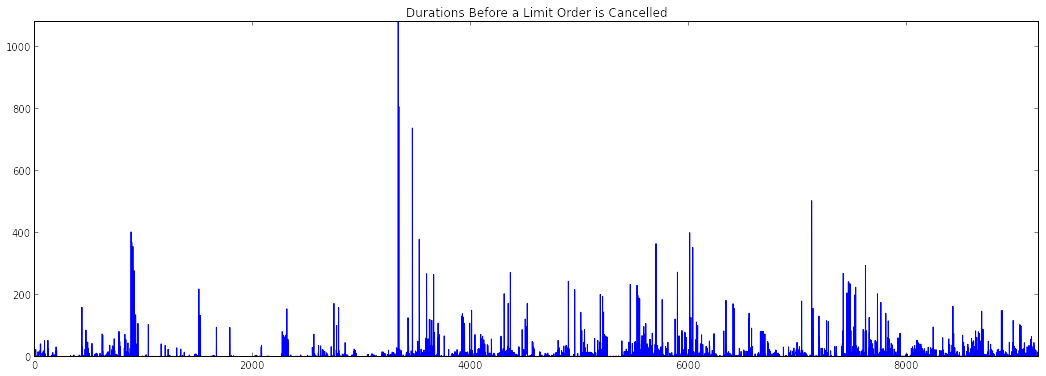

In [9]:
rcParams['figure.figsize'] = 18, 6
plt.plot(np.arange(len(cancel)), cancel)
plt.title('Durations Before a Limit Order is Cancelled')
plt.axis([0, len(cancel), min(cancel), max(cancel)])
plt.show()

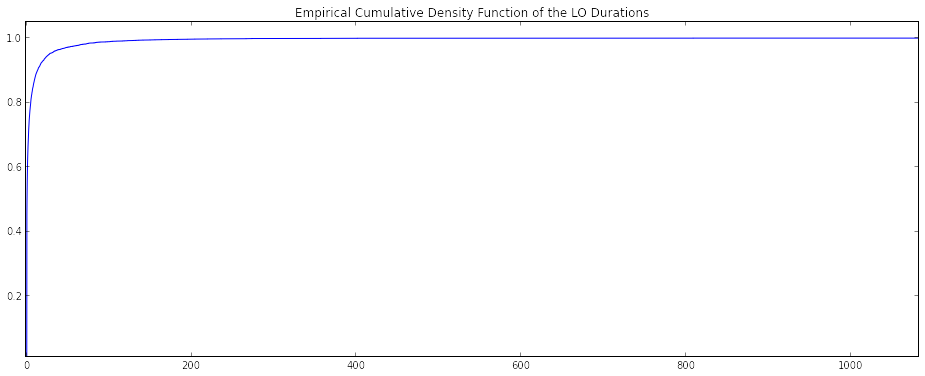

In [10]:
ecdf = sm.distributions.ECDF(cancel)
x = np.sort(cancel)
y = ecdf(x)

rcParams['figure.figsize'] = 16, 6
plt.step(x, y)
plt.title('Empirical Cumulative Density Function of the LO Durations')
plt.axis([min(x)-1, max(x), min(y), max(y)+0.05])
plt.show()

del ecdf
del x
del y